In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,recall_score,precision_score,roc_auc_score,f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df2=pd.read_csv('Titanic_test.csv')
df1=pd.read_csv('Titanic_train.csv')

#### Training Data

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df1.shape

(891, 12)

In [7]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
print(df1['Age'].fillna(df1['Age'].median()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [9]:
num_col_train=[i for i in df2 if df1[i].dtype!='object']
num_col_train

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

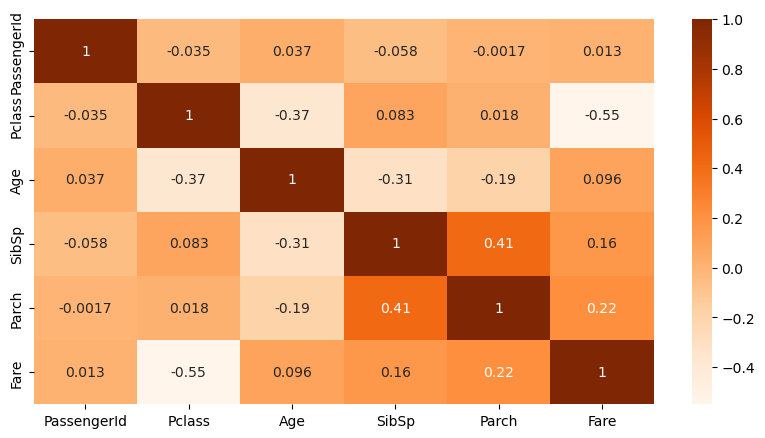

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df1[num_col_train].corr(),annot=True,cmap='Oranges');

In [11]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df1['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Visualisation

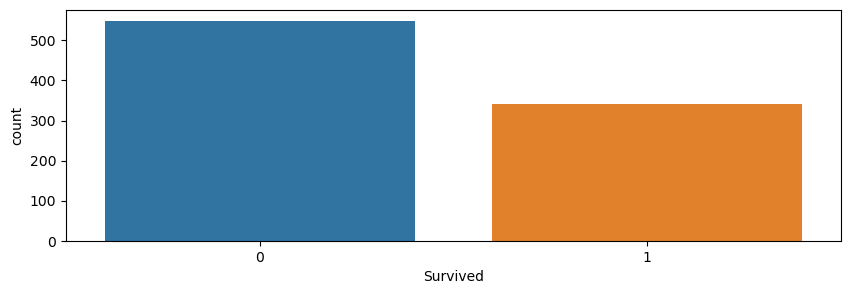

In [15]:
plt.figure(figsize=(10, 3))
sns.countplot(x ="Survived",data=df1)
plt.show()

<Figure size 1000x300 with 0 Axes>

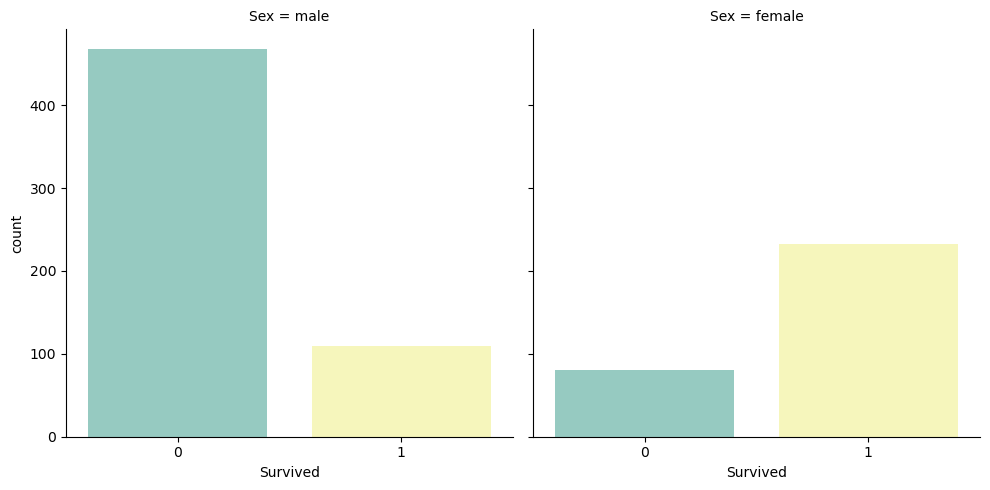

In [16]:
plt.figure(figsize=(10,3))
sns.catplot(x='Survived',col='Sex',kind='count',data=df1,palette="Set3");
plt.show()

<Figure size 1000x300 with 0 Axes>

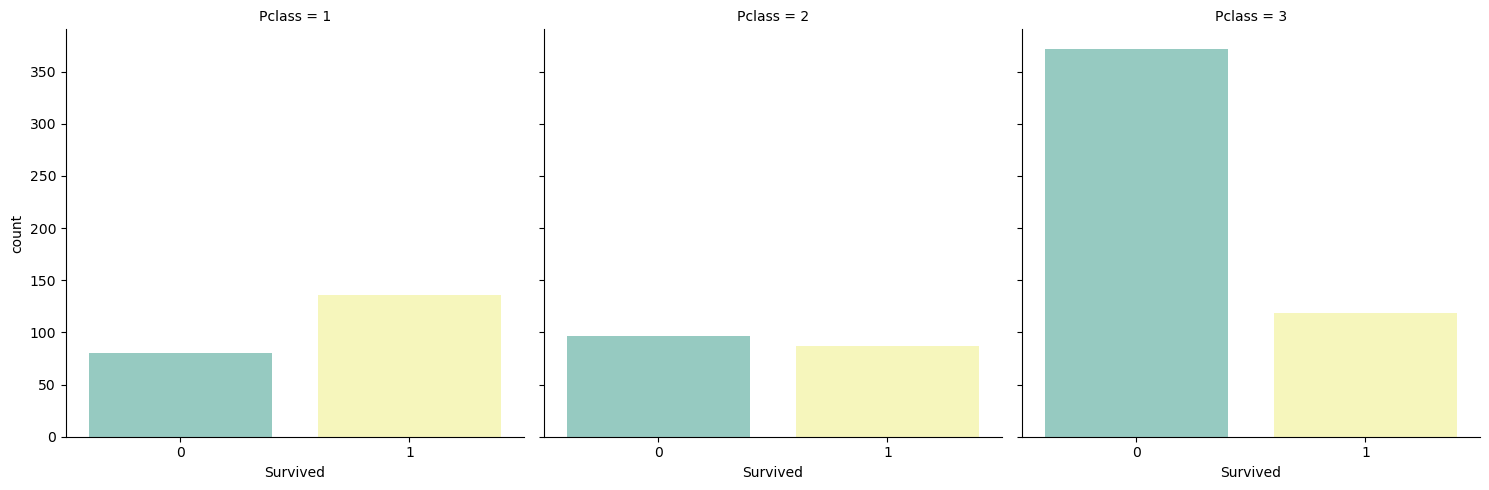

In [17]:
plt.figure(figsize=(10,3))
sns.catplot(x='Survived',col='Pclass',kind='count',data=df1,palette="Set3");
plt.show()

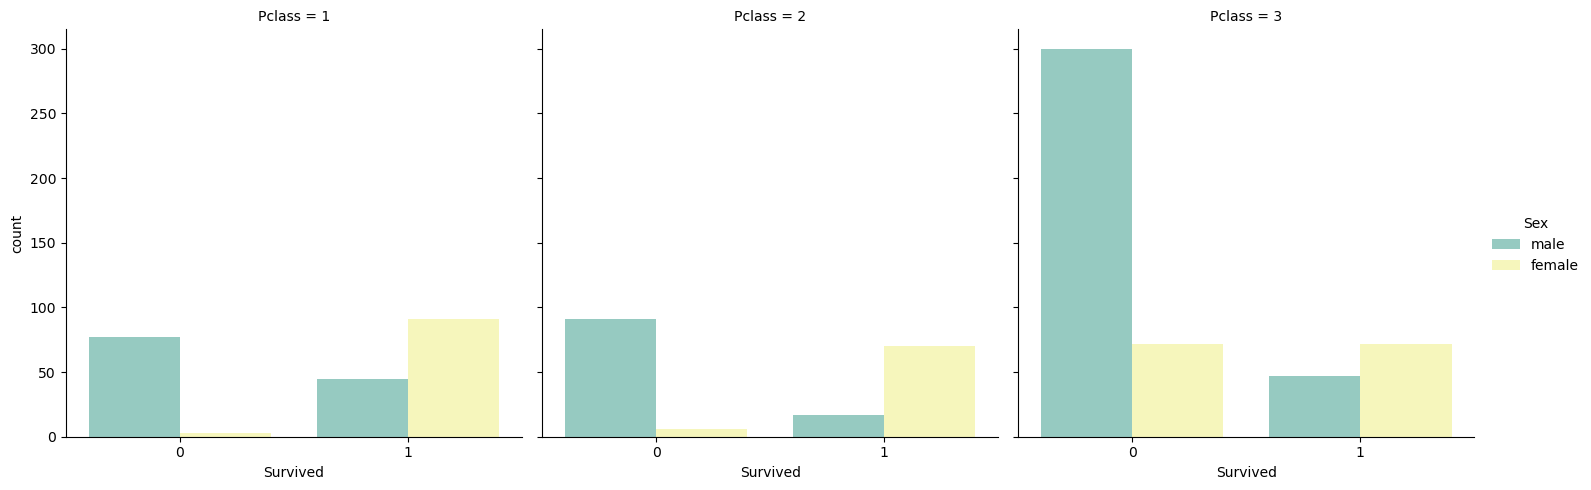

In [18]:
sns.catplot(x='Survived',col='Pclass',hue ='Sex',kind='count',data=df1,palette="Set3");
plt.show()

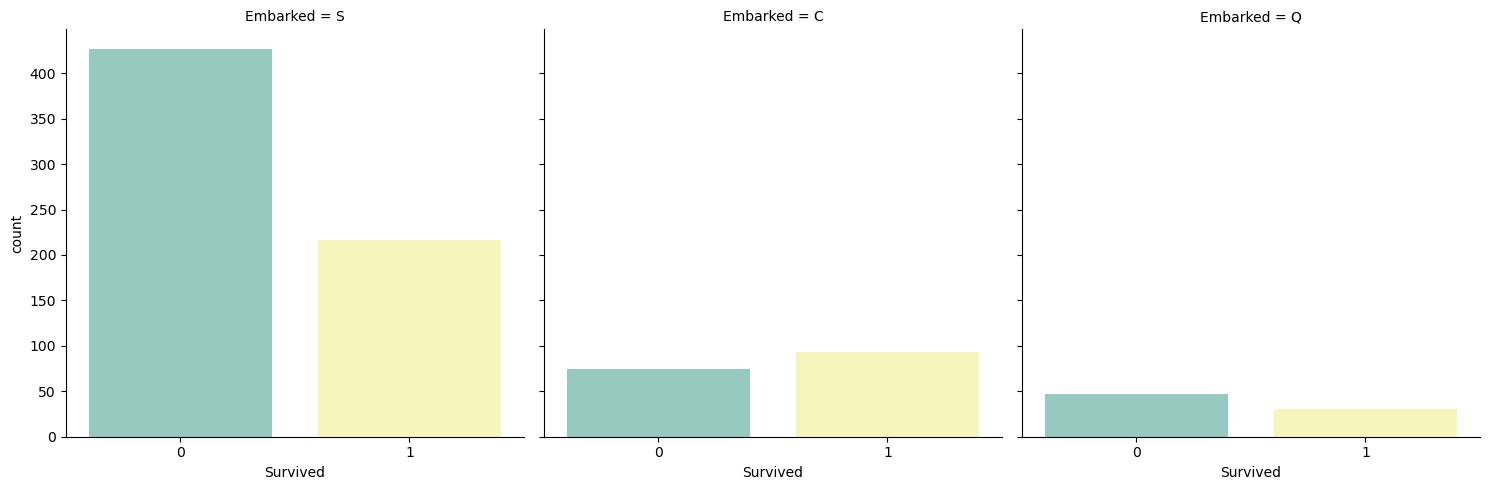

In [19]:
sns.catplot(x='Survived',col='Embarked',kind='count',data=df1,palette="Set3");
plt.show()

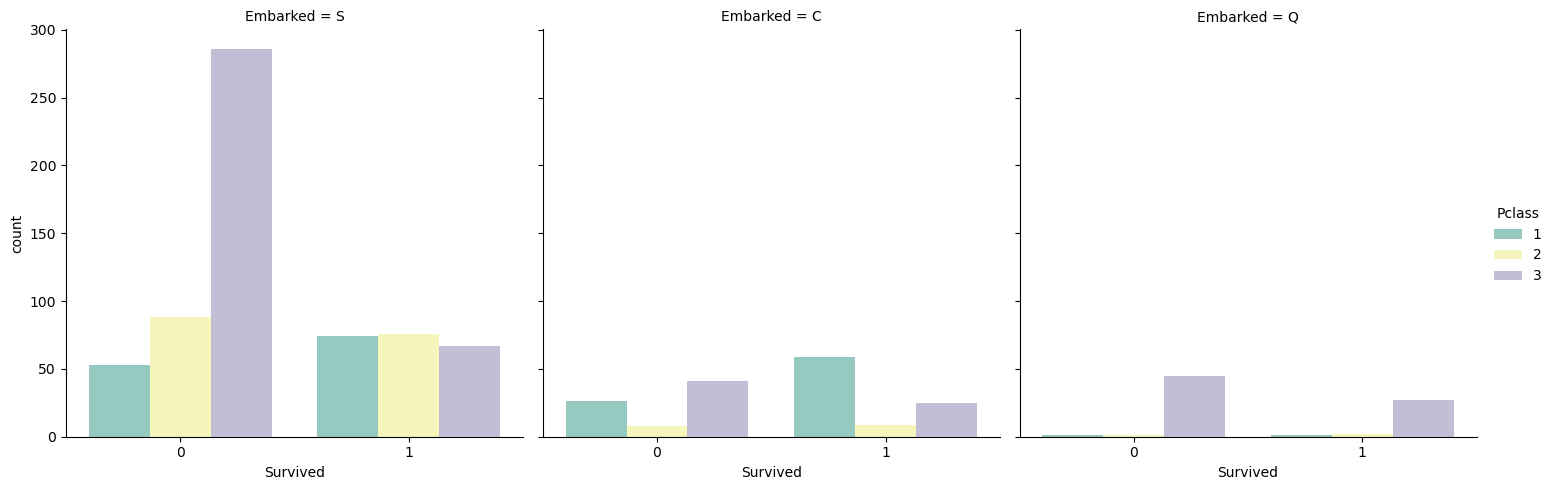

In [20]:
sns.catplot(x='Survived',col='Embarked',hue='Pclass',kind='count',data=df1,palette="Set3");
plt.show()

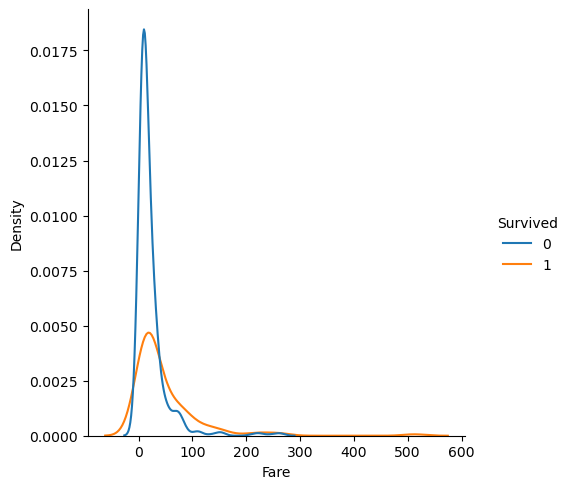

In [21]:
sns.displot(data=df1,x="Fare",hue='Survived',kind='kde')

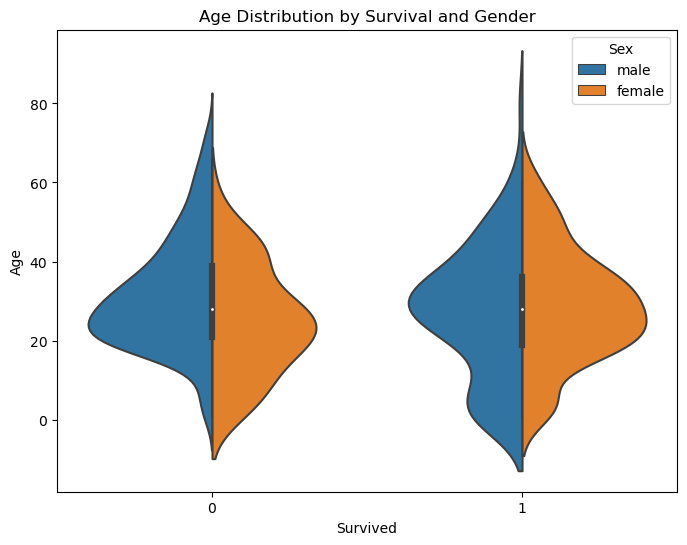

In [22]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df1,x="Survived",y="Age",hue="Sex",split=True)
plt.title("Age Distribution by Survival and Gender")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

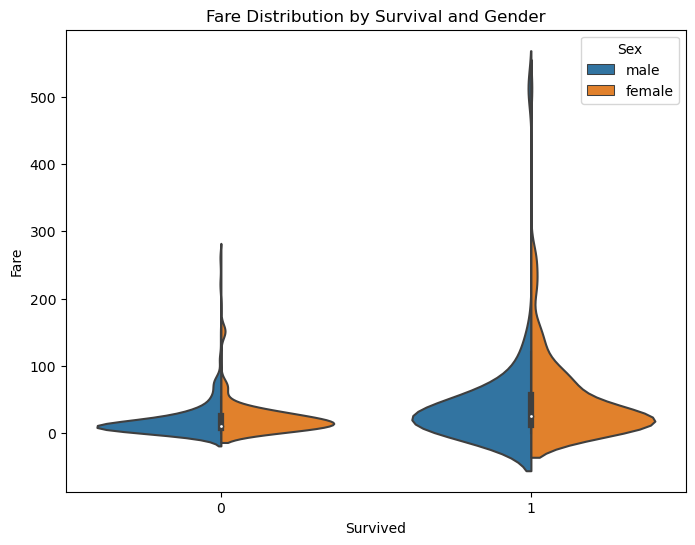

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df1,x="Survived",y="Fare",hue="Sex",split=True)
plt.title("Fare Distribution by Survival and Gender")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

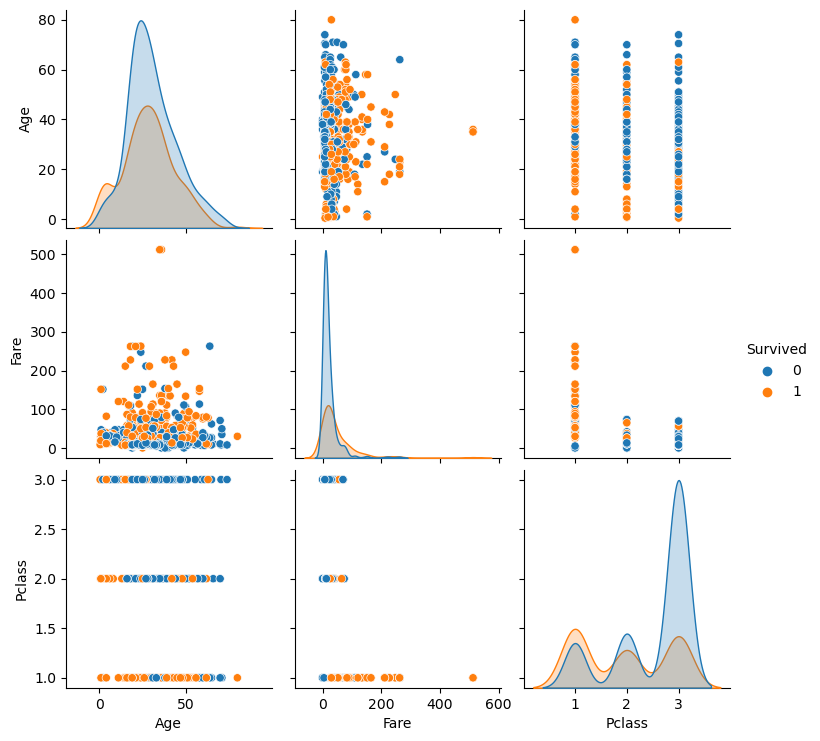

In [24]:
selected_features=["Survived","Age","Fare","Pclass"]
sns.pairplot(df1[selected_features],hue="Survived")
plt.show()

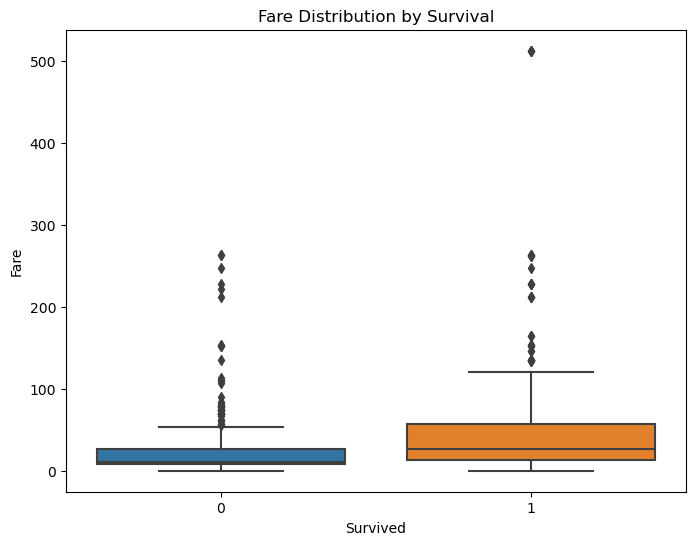

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1,x="Survived",y="Fare")
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

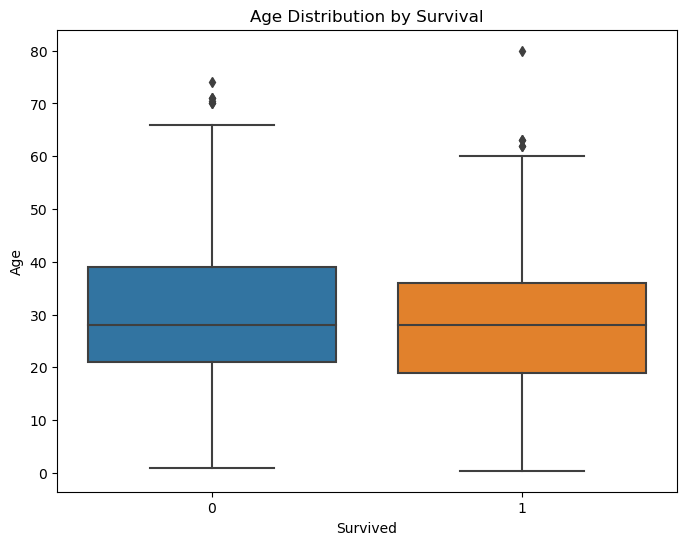

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1,x="Survived",y="Age")
plt.title("Age Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

In [27]:
import warnings
warnings.filterwarnings('ignore')

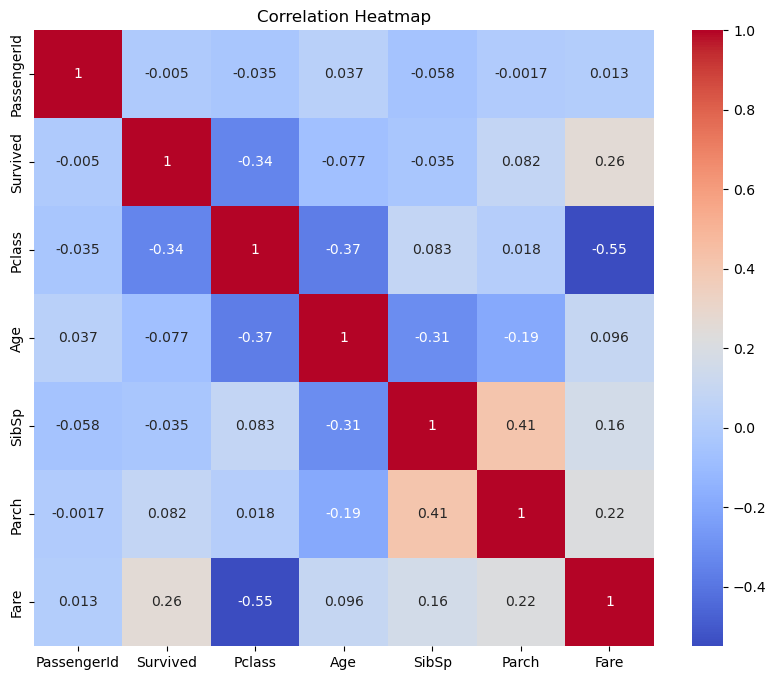

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm",)
plt.title("Correlation Heatmap")
plt.show()

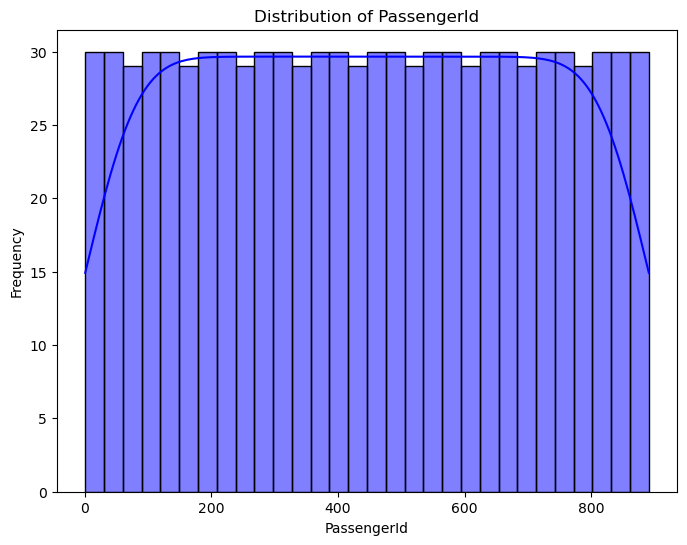

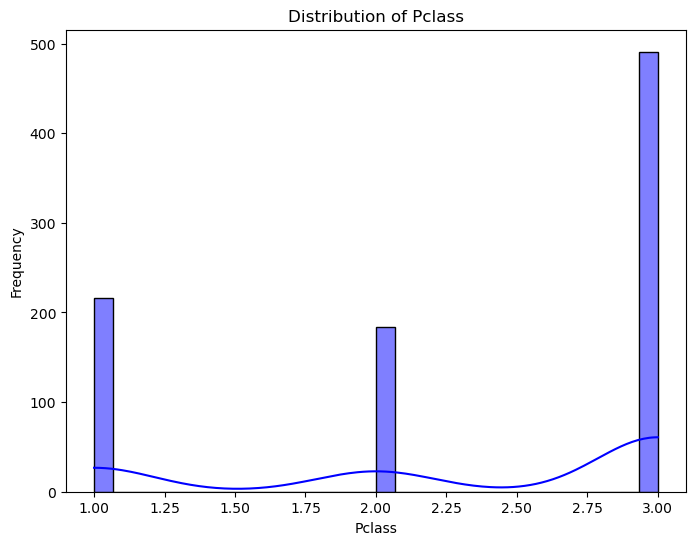

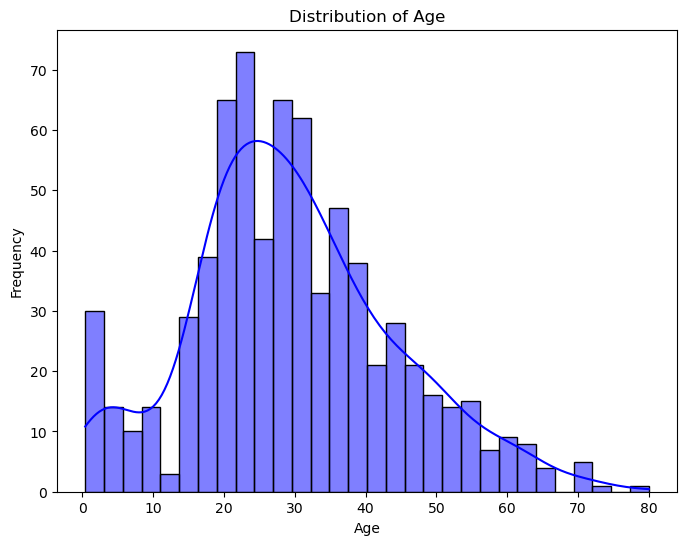

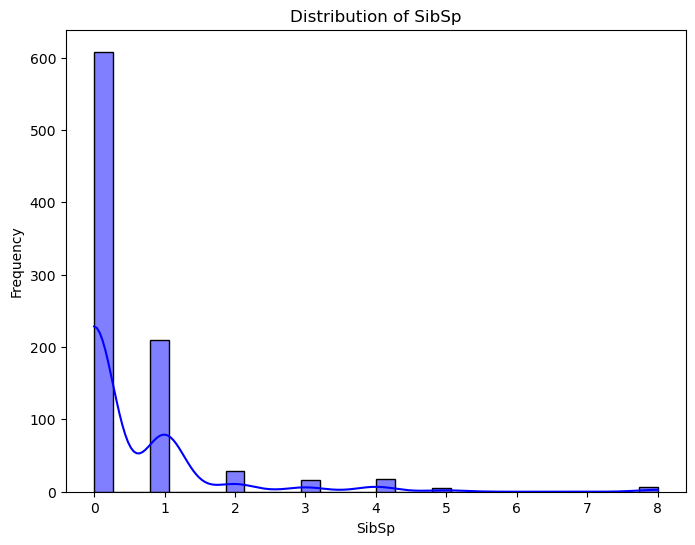

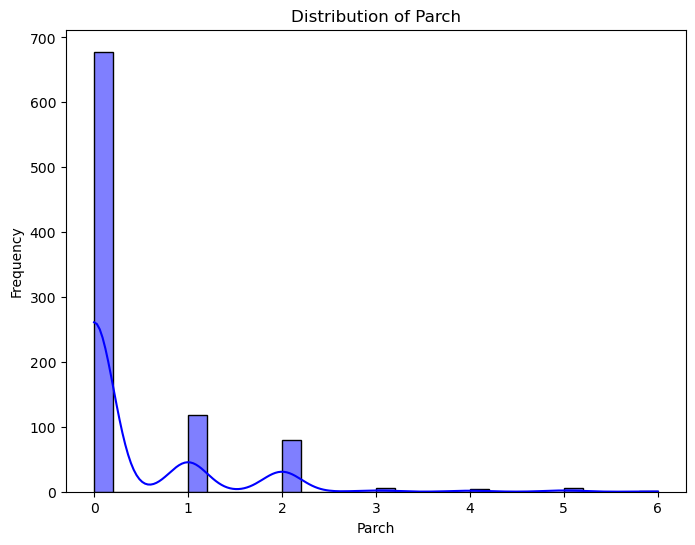

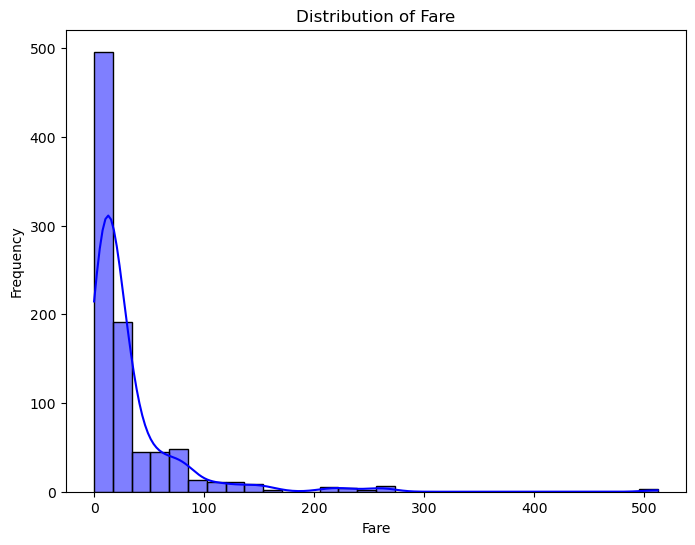

In [29]:
for i in num_col_train:
    plt.figure(figsize=(8,6))
    sns.histplot(df1[i].dropna(),kde=True,bins=30,color="blue")
    plt.title(f"Distribution of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

######Conclusion:
These visualizations will help you understand the distribution of numerical features, the relationships between different variables, and the correlation between features. You can further refine the plots and use them for deeper analysis, such as detecting patterns in survival rates, outliers, or potential features for your model.

In [30]:
pd.crosstab(df1.Sex,df1.Survived,normalize="index" )

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [31]:
pd.crosstab(df1.Pclass,df1.Survived,normalize="index" )

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [32]:
pd.crosstab(df1.Embarked,df1.Survived,normalize="index" )

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


#### Data Preprocessing

Text(0.5, 1.0, 'Age over Pclass')

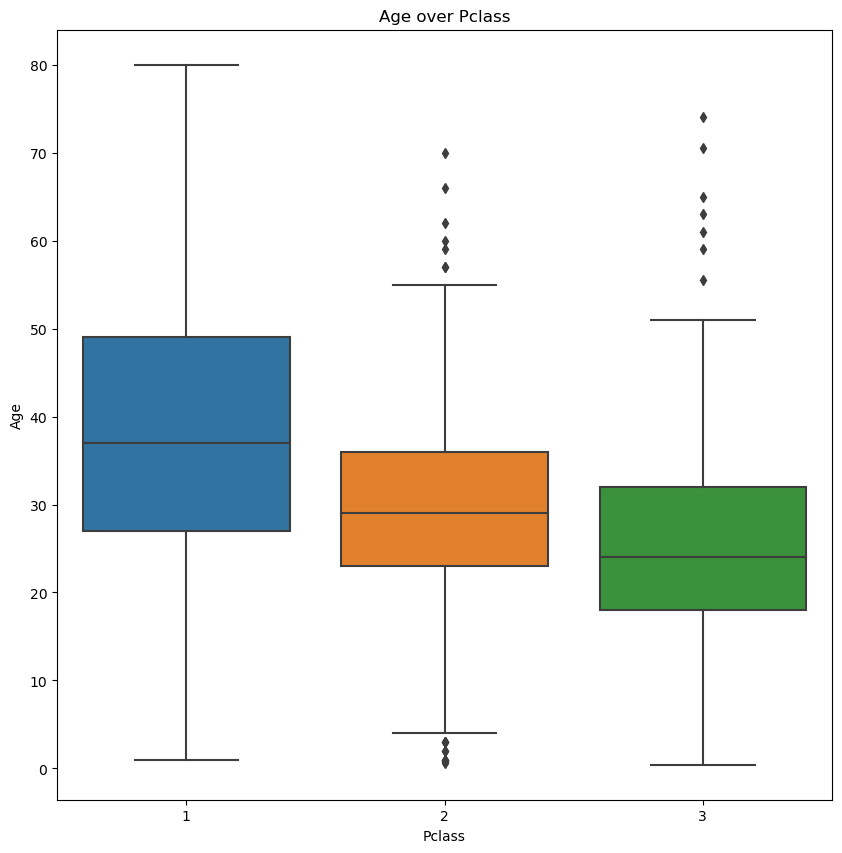

In [33]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=df1)
plt.title('Age over Pclass')

In [34]:
def impute_train_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [35]:
df1['Age']=df1[['Age','Pclass']].apply(impute_train_age,axis=1)

In [36]:
df1.shape

(891, 12)

In [37]:
df1.drop('Cabin',axis=1,inplace=True)

In [38]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [39]:
df1.shape

(891, 11)

In [40]:
df1.drop(['Name','Ticket'],axis=1,inplace=True)

In [41]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [42]:
df1=pd.get_dummies(df1,columns=['Sex'],drop_first=True)
df1=pd.get_dummies(df1,columns=['Embarked'],drop_first=True)

In [43]:
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


#### Train & Test Split

In [44]:
features=df1.drop(['Survived'],axis=1)
target=df1['Survived']

In [45]:
features.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [46]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [47]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=101)

In [48]:
x_train.shape

(712, 9)

In [49]:
y_train.shape

(712,)

In [50]:
x_test.shape

(179, 9)

In [51]:
y_test.shape

(179,)

In [52]:
x_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
733,734,2,23.0,0,0,13.00,1,0,1
857,858,1,51.0,0,0,26.55,1,0,1
81,82,3,29.0,0,0,9.50,1,0,1
319,320,1,40.0,1,1,134.50,0,0,0
720,721,2,6.0,0,1,33.00,0,0,1


In [53]:
features.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [54]:
cols=x_train.columns
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train=pd.DataFrame(x_train,columns=cols)
x_test=pd.DataFrame(x_test,columns=cols)

In [55]:
LogisticRegression_model = LogisticRegression(max_iter=4000)
LogisticRegression_model.fit(x_train,y_train)

LogisticRegression(max_iter=4000)

In [56]:
y_pred=LogisticRegression_model.predict(x_test)

In [57]:
print('Accuracy of Logistic Regression model is  : ', (accuracy_score(y_test, y_pred)))
print('Recall of Logistic Regression model is    : ', (recall_score(y_test, y_pred)))
print('Precision of Logistic Regression model is : ', (precision_score(y_test, y_pred)))

Accuracy of Logistic Regression model is  :  0.7988826815642458
Recall of Logistic Regression model is    :  0.725
Precision of Logistic Regression model is :  0.8055555555555556


In [58]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[85, 14],
       [22, 58]], dtype=int64)

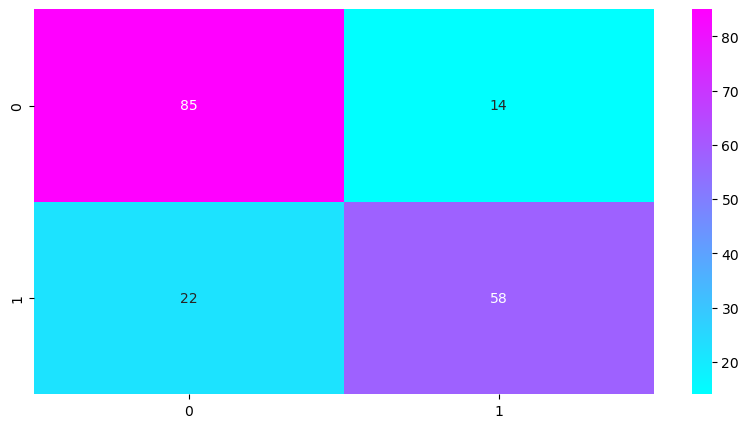

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap='cool')
plt.show()

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.81      0.72      0.76        80

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



#### Testing Data

In [61]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
df2.shape

(418, 11)

In [64]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [65]:
num_col_test=[i for i in df2 if df2[i].dtype!='object']
num_col_test

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [66]:
test_pass=df2['SibSp']
test_pass

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: SibSp, Length: 418, dtype: int64

In [67]:
print(df2['Age'].fillna(df2['Age'].median()))


0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64


In [68]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [70]:
df2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [71]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
y_pred=LogisticRegression_model.predict(x_test)

In [73]:
def impute_train_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [74]:
df2['Age']=df1[['Age','Pclass']].apply(impute_train_age,axis=1)

In [75]:
df2.drop('Cabin',axis=1,inplace=True)

In [76]:
df2.drop(['Name','Ticket'],axis=1,inplace=True)

In [77]:
null_columns=df2.columns[df2.isnull().any()]
row_num = (df2[df2["Fare"].isnull()][null_columns])
row_num

,Fare
152,NaN


In [78]:
Fare_median=df2["Fare"].median()
Fare_median

14.4542

In [79]:
df2=df2.replace(np.NaN,14.4542)

In [80]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [81]:
df2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,22.0,0,0,7.8292,Q
1,893,3,female,38.0,1,0,7.0000,S
2,894,2,male,26.0,0,0,9.6875,Q
3,895,3,male,35.0,0,0,8.6625,S
4,896,3,female,35.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,29.0,0,0,8.0500,S
414,1306,1,female,44.0,0,0,108.9000,C
415,1307,3,male,24.0,0,0,7.2500,S
416,1308,3,male,34.0,0,0,8.0500,S


In [82]:
df2=pd.get_dummies(df2,columns=['Sex'],drop_first=True)
df2=pd.get_dummies(df2,columns=['Embarked'],drop_first=True)

In [83]:
cat_col=[i for i in df2 if df2[i].dtype=='object']
cat_col

[]

In [84]:
df2

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,22.0,0,0,7.8292,1,1,0
1,893,3,38.0,1,0,7.0000,0,0,1
2,894,2,26.0,0,0,9.6875,1,1,0
3,895,3,35.0,0,0,8.6625,1,0,1
4,896,3,35.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,29.0,0,0,8.0500,1,0,1
414,1306,1,44.0,0,0,108.9000,0,0,0
415,1307,3,24.0,0,0,7.2500,1,0,1
416,1308,3,34.0,0,0,8.0500,1,0,1


In [85]:
X1_Train=df1.drop(['Survived'],axis=1)
y1_Train=df1['Survived']

In [86]:
cols=df2.columns
scal=RobustScaler()
X1_Train = scal.fit_transform(X1_Train)
df2=scal.transform(df2)

In [87]:
X1_Train=pd.DataFrame(X1_Train,columns=cols)
df2=pd.DataFrame(df2,columns=cols)

In [88]:
X1_Train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-1.000000,0.0,-0.266667,1.0,0.0,-0.312011,0.0,0.0,0.0
1,-0.997753,-2.0,0.800000,1.0,0.0,2.461242,-1.0,0.0,-1.0
2,-0.995506,0.0,0.000000,0.0,0.0,-0.282777,-1.0,0.0,0.0
3,-0.993258,-2.0,0.600000,1.0,0.0,1.673732,-1.0,0.0,0.0
4,-0.991011,0.0,0.600000,0.0,0.0,-0.277363,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0.991011,-1.0,0.066667,0.0,0.0,-0.062981,0.0,0.0,0.0
887,0.993258,-2.0,-0.466667,0.0,0.0,0.673281,-1.0,0.0,0.0
888,0.995506,0.0,-0.133333,1.0,2.0,0.389604,-1.0,0.0,0.0
889,0.997753,-2.0,0.000000,0.0,0.0,0.673281,0.0,0.0,-1.0


In [89]:
df2

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.002247,0.0,-0.266667,0.0,0.0,-0.286926,0.0,1.0,-1.0
1,1.004494,0.0,0.800000,1.0,0.0,-0.322838,-1.0,0.0,0.0
2,1.006742,-1.0,0.000000,0.0,0.0,-0.206444,0.0,1.0,-1.0
3,1.008989,0.0,0.600000,0.0,0.0,-0.250836,0.0,0.0,0.0
4,1.011236,0.0,0.600000,1.0,1.0,-0.093839,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
413,1.930337,0.0,0.200000,0.0,0.0,-0.277363,0.0,0.0,0.0
414,1.932584,-2.0,1.200000,0.0,0.0,4.090404,-1.0,0.0,-1.0
415,1.934831,0.0,-0.133333,0.0,0.0,-0.312011,0.0,0.0,0.0
416,1.937079,0.0,0.533333,0.0,0.0,-0.277363,0.0,0.0,0.0


In [90]:
LogisticRegression_model.fit(X1_Train,y1_Train)

LogisticRegression(max_iter=4000)

In [91]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [95]:
accuracy_2=accuracy_score(test_pass, y_pred_2)
accuracy_2

0.5311004784688995

In [93]:
y_pred_2=LogisticRegression_model.predict(df2)

In [94]:
y_pred_2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [96]:
result=pd.DataFrame({'PassengerId':test_pass,'Survived':y_pred_2})
result

,PassengerId,Survived
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,0,1
415,0,0
416,0,0


In [101]:
y_pred=LogisticRegression_model.predict(x_test)
y_prob=LogisticRegression_model.predict_proba(x_test)[:, 1]

In [97]:
test_pass

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: SibSp, Length: 418, dtype: int64

In [98]:
print('Accuracy of Logistic Regression model is:',(accuracy_score(test_pass,y_pred_2)))


Accuracy of Logistic Regression model is: 0.5311004784688995


In [106]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8044692737430168
Precision: 0.8260869565217391
Recall: 0.7125
F1 Score: 0.7651006711409396
ROC AUC Score: 0.8777777777777778


In [99]:
print(classification_report(test_pass,y_pred_2))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64       283
           1       0.31      0.50      0.38       110
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.53       418
   macro avg       0.14      0.16      0.15       418
weighted avg       0.55      0.53      0.53       418



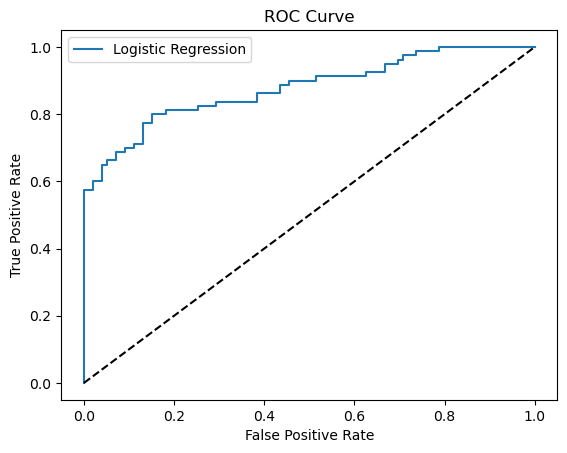

In [109]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

####  Interpretation

In [111]:
coefficients =LogisticRegression_model.coef_[0]
features=features.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print(coef_df)

       Feature  Coefficient
0  PassengerId     0.037183
1       Pclass    -1.137446
2          Age    -0.617888
3        SibSp    -0.325481
4        Parch    -0.078942
5         Fare     0.045962
6     Sex_male    -2.621550
7   Embarked_Q    -0.085603
8   Embarked_S    -0.375527


#a. Interpret the Coefficients of the Logistic Regression Model
The coefficients in a logistic regression model represent the log-odds change of the target variable (e.g., survival) for a one-unit increase in the predictor variable, keeping other predictors constant.

For example:

A positive coefficient indicates an increase in the odds of survival.
A negative coefficient indicates a decrease in the odds of survival.
b. Discuss the Significance of Features
Using statistical tests (e.g., p-values or confidence intervals), assess whether each feature significantly contributes to predicting the target.

Features with small p-values are statistically significant.
Analyze standardized coefficients to understand their relative importance in predicting survival probability.

#=>Handling Missing Values (Imputation):

need to handle missing values for columns like Age, Embarked, and potentially Fare or Cabin.

=>Impute missing values in Age with the median, as it's a numerical feature and median is less sensitive to outliers.

=>Impute missing values in Embarked with the mode (most frequent value) as it’s a categorical feature.

=>Drop the Cabin column due to a high percentage of missing values (typically around 75%), making it less useful.

#=>Encoding Categorical Variables:

Since machine learning algorithms require numerical input, we need to encode categorical variables like Sex, Embarked, and Pclass.

=>Encode Sex using Label Encoding, as it has two categories (Male, Female).

=>Encode Embarked using One-Hot Encoding, as it has more than two categories (C, Q, S).

=>Encode Pclass can be left as numerical, but if needed, One-Hot Encoding can be applied.

#### Deployment with Streamlit

In [112]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [114]:
import streamlit as st
import joblib
joblib.dump(LogisticRegression_model,'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

#### Interview Questions:

### 1. What is the difference between precision and recall?
Precision and recall are two important metrics used to evaluate the performance of classification models, particularly in scenarios where the dataset is imbalanced. They both provide insights into how well the model is predicting the positive class, but they measure different aspects.

 1. **Precision
- **Definition**: Precision is the proportion of true positive predictions out of all the predictions that were classified as positive.


  Precision = True Positives/True Positives + False Positives


- **Interpretation**: Precision answers the question: *"Of all the positive predictions made by the model, how many were actually correct?"*
  
- **Use Case**: Precision is particularly important when the cost of false positives is high. For example, in email spam detection, if a legitimate email is falsely classified as spam (false positive), it could be problematic. Therefore, high precision ensures fewer legitimate emails are incorrectly classified as spam.

 2. **Recall**:
- **Definition**: Recall, also known as sensitivity or true positive rate, is the proportion of true positive predictions out of all the actual positive instances in the dataset.
  
  Recal = True Positives\True Positives + False Negatives
  

- **Interpretation**: Recall answers the question: *"Of all the actual positives, how many did the model correctly identify?"*
  
- **Use Case**: Recall is important when the cost of false negatives is high. For instance, in medical diagnoses (such as detecting a disease), if a patient with the disease is incorrectly classified as healthy (false negative), it could be dangerous. Therefore, high recall ensures that as many actual positives as possible are correctly identified.

 Key Differences:
- **Precision** focuses on the accuracy of positive predictions (how many of the predicted positives are truly positive).
- **Recall** focuses on how well the model identifies all actual positive cases (how many of the actual positives are correctly identified).

 Precision vs. Recall Tradeoff:
- There is often a tradeoff between precision and recall. By optimizing for precision, you may sacrifice recall, and vice versa. For example:
  - If you adjust your model to be more stringent (e.g., only classify as positive if you are very sure), you will increase precision but decrease recall.
  - If you adjust it to be more lenient (e.g., classify more cases as positive), you will increase recall but reduce precision.

 Example in Binary Classification (Survived or Not Survived):
- **Precision**: If the model predicts a passenger survived, how often is that correct?
- **Recall**: If a passenger actually survived, how often did the model correctly identify that they survived?

In summary, **precision** is more about minimizing false positives, and **recall** is more about minimizing false negatives. Depending on the problem, one might be more important than the other.

### 2. What is cross-validation, and why is it important in binary classification?
 **Cross-Validation**:
Cross-validation is a technique used to assess the performance of a machine learning model and ensure that it generalizes well to unseen data. It involves splitting the dataset into multiple subsets (or "folds"), training the model on some of these subsets, and testing it on the remaining subset(s). This process is repeated multiple times to ensure that the model's performance is evaluated on different portions of the data.

 **How Cross-Validation Works**:
The most common form of cross-validation is **K-fold cross-validation**, where the dataset is divided into \( K \) equally sized folds:

1. **Split the dataset** into \( K \) subsets (or folds).
2. **Train the model** on \( K-1 \) of these folds, using the remaining fold to **test** the model.
3. Repeat the process \( K \) times, each time using a different fold as the test set, and the others as the training set.
4. **Aggregate the results**: After \( K \) iterations, you can average the performance metrics (e.g., accuracy, precision, recall, etc.) to obtain a more reliable estimate of the model's performance.

**Why Cross-Validation is Important in Binary Classification**:

1. **Better Generalization**:
   - Cross-validation helps assess how well the model generalizes to new, unseen data. It reduces the risk of overfitting (where the model performs well on the training data but poorly on unseen data).
   - In binary classification, it ensures that the model doesn't just memorize the data (which may lead to a high variance), but instead learns to predict the classes effectively on different samples.

2. **Reduced Bias**:
   - By testing the model on different subsets of data, cross-validation helps reduce the bias that may result from training on a single split of the data.
   - It provides a more accurate and stable estimate of the model’s performance than a single train-test split.

3. **Improved Model Evaluation**:
   - It ensures that the model's performance is not sensitive to the particular train-test split. This is especially important when dealing with small datasets, as it maximizes the use of available data for both training and testing.
   - In binary classification, where the classes may be imbalanced, cross-validation ensures that both classes are represented in the training and testing subsets, improving the model's ability to handle class imbalances.

4. **Hyperparameter Tuning**:
   - Cross-validation is useful in selecting the best hyperparameters for a model. You can test different hyperparameter settings on different folds, and select the best combination based on the performance across all folds.
   - This helps in improving the accuracy and robustness of the model.

5. **Dealing with Small Datasets**:
   - When the dataset is small, using cross-validation ensures that the model has been trained and tested on different portions of the data, making the most out of the limited available data.
   - In binary classification, small datasets may lead to models that are overfit or underperform, so cross-validation helps identify such issues early.

### **Example** (for binary classification):
Consider a binary classification problem like predicting whether a passenger survived or not in the Titanic dataset.

- **Without cross-validation**, you might train a model on 80% of the data and test it on the remaining 20%. If this split doesn't represent the overall distribution of features or target values (e.g., a skewed class distribution), the model's evaluation may be misleading.
  
- **With K-fold cross-validation**, the model is trained and tested multiple times on different parts of the dataset, providing a more reliable measure of how well it will perform in real-world situations.

### **Summary**:
Cross-validation is an essential technique for assessing a model's performance, particularly in binary classification. It helps:
- Ensure the model generalizes well to unseen data.
- Provide a more stable and accurate performance estimate.
- Prevent overfitting and reduce bias.
- Improve the model's ability to handle imbalanced data and small datasets.